In [9]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from matplotlib.ticker import LogLocator, LogFormatter
from time import time
seed = 903966526
svc = SVC(random_state=seed)

In [10]:
# prep data
df = pd.read_csv('adult.csv')
X = df.drop(columns={"income"},axis=1)
y = df["income"].values.reshape(-1,1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=903966526)

In [11]:
#learning curve
lc_size = [x / 100.0 for x in range(1, 101, 2)]
_, lc_train, lc_test = learning_curve(
    estimator= svc,
    X= X,
    y= y,
    train_sizes= lc_size,
    scoring= 'accuracy',
    n_jobs= -1
)
lc_train = np.mean(lc_train, axis=1)
lc_test = np.mean(lc_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y 

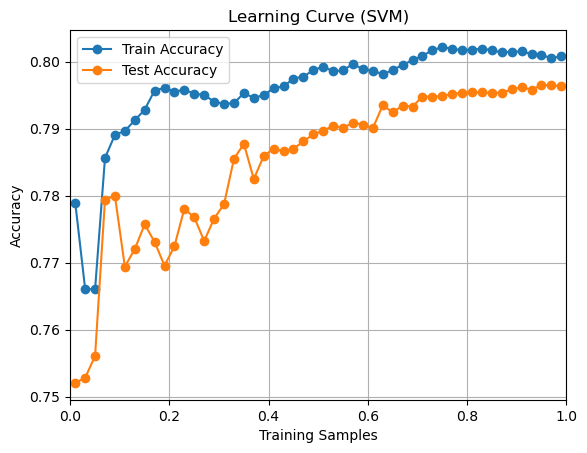

In [12]:
#learning curve graph
plt.plot(lc_size, lc_train, label='Train Accuracy', linestyle='-', marker='o')
plt.plot(lc_size, lc_test, label='Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (SVM)')
plt.legend(loc='upper left')
plt.xlim(0,1)
plt.grid(True)
plt.savefig('images/svm_learncurve.png')
plt.show()
plt.close()

In [13]:
#validation curve - kernel
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
vc_k_train, vc_k_test = validation_curve(
    estimator= svc,
    X= X,
    y= y,
    param_name= 'kernel',
    param_range= kernel,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_k_train = np.mean(vc_k_train, axis=1)
vc_k_test = np.mean(vc_k_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y 

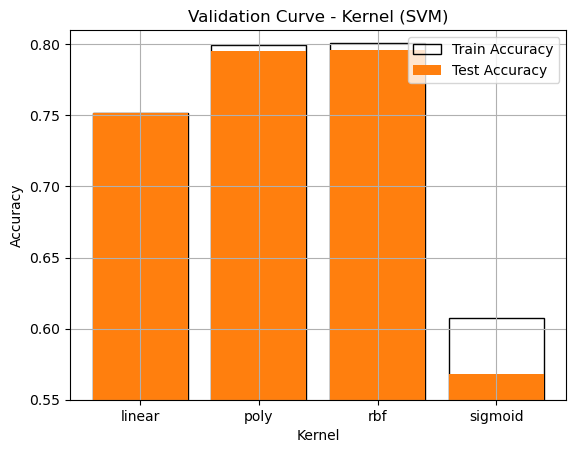

In [14]:
#learning curve - kernel graph
plt.bar(kernel, vc_k_train, label= 'Train Accuracy', fill=False)
plt.bar(kernel, vc_k_test, label= 'Test Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Kernel (SVM)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0.55, 0.81)
plt.savefig('images/svm_valcurve_kernel.png')
plt.show()
plt.close()

In [15]:
print(f'Best kernel: {kernel[np.argmax(vc_k_train)]}')

Best kernel: rbf


In [16]:
#validation curve - degree
degree = range(1, 7)
vc_d_train, vc_d_test = validation_curve(
    estimator= SVC(kernel='poly'),
    X= X,
    y= y,
    param_name= 'degree',
    param_range= degree,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_d_train = np.mean(vc_d_train, axis=1)
vc_d_test = np.mean(vc_d_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y 

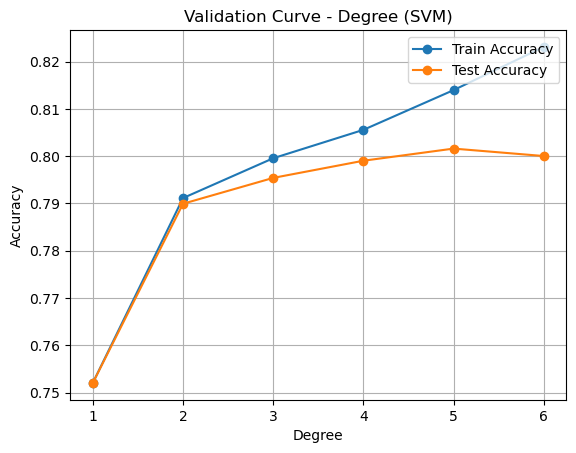

In [17]:
#learning curve - degree
plt.plot(degree, vc_d_train, label= 'Train Accuracy', linestyle='-', marker='o')
plt.plot(degree, vc_d_test, label= 'Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Degree (SVM)')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('images/svm_valcurve_degree.png')
plt.show()
plt.close()

In [18]:
# parameter optimization
param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': range(1, 7),
}
grid = GridSearchCV(
    estimator= svc,
    param_grid= param, 
    scoring= 'accuracy', 
    n_jobs=-1
)
grid.fit(X_train, y_train)

optimal = grid.best_estimator_
test_score = optimal.score(X_test, y_test)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y 

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y 

In [19]:
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-validation score: {grid.best_score_}')
print(f'Test Accuracy: {test_score}')

Best Parameters: {'degree': 6, 'kernel': 'poly'}
Best Cross-validation score: 0.8034296777762412
Test Accuracy: 0.8059519858391415


In [20]:
start = time()
final = SVC(**grid.best_params_)
final.fit(X_train, y_train)
pred = final.predict(X_test)
end = time()
duration = end - start
print(f'Train duration: {duration}s')

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train duration: 282.9928228855133s
